In [40]:
import matplotlib.pyplot as plt
from lib.preprocess import preprocess_progenitor_size, preprocess_whole_size
from lib.utils import shrink_and_align_stats
from lib.score import REF
from lib.analyser import show_curve, show_curve_progenitor
from jf.utils.export import Exporter
from jf.models.stringmodel import read_model
import os
from lib.sde.grn.grn5 import GRNMain5 as GRNMain
from lib.sde.mutate import mutate_grn5 as mutate_grn
from lib.utils import pick_best, pick_last
import re
from itertools import groupby
import pandas as pd
import numpy as np

In [2]:
sm = read_model("generation")

In [4]:
class Solution:
    def __init__(self, grn):
        self.grn = grn
        
    def copy(self):
        return Solution(self.grn.copy())
        
    def mutate(self):
        mutate_grn(self.grn)

In [119]:
def plot_max_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), max(exporter.load(x)["fitness"])) for x in ls]
    vals.sort()
    plt.title("Max fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)
    
def plot_sum_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), sum(exporter.load(x)["fitness"])) for x in ls]
    vals.sort()
    plt.title("Sum fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)

In [17]:
# sm.pick_last(sorted(exporter.list()), slot="generation")

In [8]:
regex = "exp_mut_100322_t([0-9.]+)_sp([0-9.]+)_id(\d)"
re.findall(regex, "exp_mut_100322_t0.05_sp0.1_id0")

[('0.05', '0.1', '0')]

In [15]:
re.match(regex, "exp_mut_100322_t0.05_sp0.1_id0")

<re.Match object; span=(0, 30), match='exp_mut_100322_t0.05_sp0.1_id0'>

In [60]:
exp_muts = filter(lambda x: re.match(regex, x), os.listdir("output/"))
exp_muts_loaded = map(lambda x: [*re.findall(regex, x)[0], Exporter(name=x, silent=True)], exp_muts)
grouped_exp_muts = groupby(sorted(exp_muts_loaded), key=lambda x: x[:2])

for k, v in grouped_exp_muts:
    print(k, np.mean([pick_best(exp.load("generation_g1")).fit for *_, exp in v]))

['0.05', '0.0'] 990.4603474838347
['0.05', '0.1'] 995.1803294911442
['0.05', '0.2'] 992.2203474838346
['0.05', '0.5'] 998.0936811920158
['0.05', '1.0'] 996.0283474838349
['0.1', '0.0'] 996.8470149001967
['0.1', '0.1'] 998.5416811920156
['0.1', '0.2'] 998.767014900197
['0.1', '0.5'] 996.7196716333989
['0.1', '1.0'] 998.1803294911442
['0.2', '0.0'] 998.009662074782
['0.2', '0.1'] 997.367671633399
['0.2', '0.2'] 997.8023188079842
['0.2', '0.5'] 994.864328366601
['0.2', '1.0'] 998.335671633399


In [33]:
exp = Exporter(name="exp_mut_100322_t0.05_sp0.1_id1")

Exporting at output/exp_mut_100322_t0.05_sp0.1_id1


In [34]:
exp.list()

['generation_g2',
 'out',
 'generation_g0',
 'generation_g1',
 'definition',
 'generation_g3']

In [51]:
# exp.load("generation_g1")

In [38]:
res = pick_best(exp.load(pick_last(exp)))

In [45]:
res.grn

>> G_0: init: 1.02; noise: 1.00; b: 4.02; m: 3.94; expr: 1.01; deg: 0.10; theta: 1.68; asym: 5.00; tree : 2
>> G_1: init: 0.95; noise: 1.02; b: 1.69; m: 5.07; expr: 0.93; deg: 0.10; theta: 5.57; asym: 5.00; tree : -5
>> G_2: init: 0.89; noise: 1.02; b: 2.18; m: 4.79; expr: 1.00; deg: 0.09; theta: 8.43; asym: 5.00; tree : (-4 AND (5 OR -0))
>> G_3: init: 1.35; noise: 0.95; b: 1.91; m: 9.17; expr: 0.96; deg: 0.10; theta: 6.01; asym: 5.00; tree : -1
>> G_4: init: 1.42; noise: 0.97; b: 0.90; m: 2.79; expr: 1.02; deg: 0.10; theta: 3.39; asym: 5.16; tree : -5

In [111]:
exporter = Exporter(name="result_m3_t0.25_n7_o1.5_i2")

Exporting at output/result_m3_t0.25_n7_o1.5_i2


In [109]:
def match(self, string):
    slots = self._get_model_slots()
    substrings = self._split(string)
    if len(slots) != len(substrings):
        return False

    for (prefix, _), substring in zip(slots, substrings):
        if not re.match(f"{prefix}.*", substring):
            return False

    return True

In [114]:
res = exporter.load("generation_g29")

In [120]:
len(res["fitness"])

50

In [115]:
def pick_best_sol_stats(res):
    fit = res['fitness']
    index = fit.index(max(fit))
    sol = res["solution"][index]
    stats = res["stats"][index]
    print("fit is ", max(fit))
    return sol, stats

['generation_g0', 'generation_g1', 'generation_g10', 'generation_g11', 'generation_g12', 'generation_g13', 'generation_g14', 'generation_g15', 'generation_g16', 'generation_g17', 'generation_g18', 'generation_g19', 'generation_g2', 'generation_g20', 'generation_g21', 'generation_g22', 'generation_g23', 'generation_g24', 'generation_g25', 'generation_g26', 'generation_g27', 'generation_g28', 'generation_g29', 'generation_g3', 'generation_g4', 'generation_g5', 'generation_g6', 'generation_g7', 'generation_g8', 'generation_g9'] ['generation_g27', 'generation_g6', 'generation_g19', 'generation_g0', 'generation_g10', 'generation_g15', 'generation_g17', 'out', 'generation_g21', 'generation_g26', 'generation_g16', 'generation_g11', 'generation_g9', 'generation_g20', 'generation_g7', 'definition', 'generation_g29', 'generation_g23', 'generation_g4', 'generation_g28', 'generation_g14', 'generation_g25', 'generation_g13', 'generation_g1', 'generation_g24', 'generation_g22', 'generation_g2', 'gen

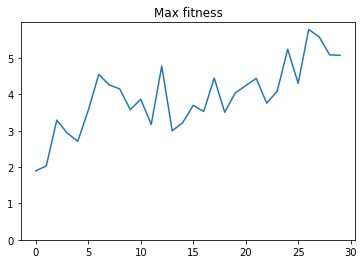

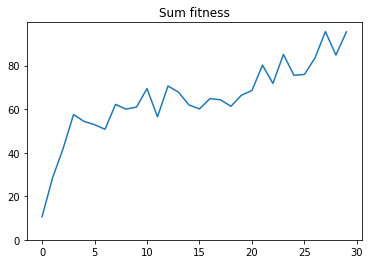

In [118]:
plot_max_fitness(exporter, sm)
plt.show()
plot_sum_fitness(exporter, sm)

In [100]:
last_gen = sm.pick_last(sorted(exporter.list()), slot="generation")
last_gen

fit is  28.728232862077576


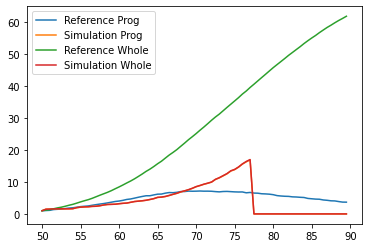

In [104]:
# res = exporter.load(last_gen)
res = exporter.load("generation_24")
sol, stats = pick_best_sol_stats(res)
show_curve(stats, REF)

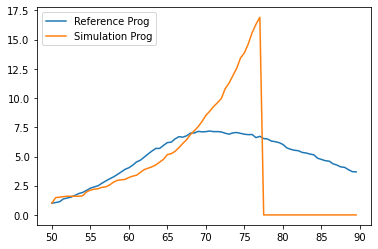

In [105]:
show_curve_progenitor(stats, REF)

fit is  2.1746606933406607


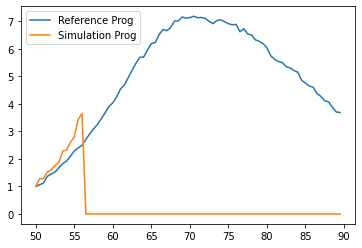

>> G_0: init: 0.06; noise: 3.79; b: 2.86; m: 4.03; expr: 2.54; deg: 4.32; theta: 5.52; tree : 7
>> G_1: init: 2.86; noise: 7.07; b: 2.92; m: 5.74; expr: 2.27; deg: 6.08; theta: 4.74; tree : NOT NOT 0
>> G_2: init: 1.13; noise: 6.18; b: 9.64; m: 5.20; expr: 3.36; deg: 5.47; theta: 6.91; tree : (0 OR 5)
>> G_3: init: 0.48; noise: 3.01; b: 2.34; m: 4.10; expr: 8.11; deg: 2.51; theta: 1.83; tree : 8
>> G_4: init: 1.51; noise: 1.04; b: 9.51; m: 3.22; expr: 5.22; deg: 6.85; theta: 7.17; tree : NOT (((((2 OR 10) AND 8) OR NOT 7) AND 1) OR 5)
>> G_5: init: 2.39; noise: 5.04; b: 9.15; m: 7.59; expr: 3.52; deg: 3.62; theta: 5.87; tree : NOT 0
>> G_6: init: 1.51; noise: 3.09; b: 9.33; m: 6.17; expr: 0.94; deg: 2.34; theta: 0.38; tree : (NOT (5 AND 0) OR 10)
>> G_7: init: 0.76; noise: 7.25; b: 5.20; m: 5.94; expr: 4.05; deg: 6.64; theta: 4.89; tree : NOT (NOT 8 OR (9 AND 7))
>> G_8: init: 1.10; noise: 3.60; b: 4.94; m: 8.33; expr: 2.74; deg: 2.73; theta: 3.00; tree : (3 AND (0 AND 6))
>> G_9: init

In [57]:
res = exporter.load(last_gen)
sol, stats = pick_best_sol_stats(res)
show_curve_progenitor(stats, REF)
sol.grn

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 3) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 7.90; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.87; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : (NOT (NOT NOT 4 AND 5) OR 1)